In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time
import subprocess

In [18]:
template_str = \
""" {0} 	Pressure (bar from 0.1 to 120)
 {1} 	Temperature (K from 300 to 4500)
 {2} 	H2 molar share
 {3} 	O2 molar share
 {4} 	H2O molar share
 {5} 	OH molar share
 {6} 	HO2 molar share
 {7} 	H2O2 molar share
 {8} 	H molar share
 {9} 	O molar share
 {10} 	N2 molar share
 {11} 	Ar molar share
 {12} 	Time step dt, microseconds
 {13} 	Number of time steps
 result.txt 	File of results
 2687746 	Read control: do not change"""

template_configuration = {"P":  1.0,
                         "T":   1100,
                         "H2":  2.0,
                         "O2":  1.0,
                         "H2O": 0.0,
                         "OH":  0.0,
                         "HO2": 0.0, 
                         "H2O2":0.0,
                         "H":   0.0,
                         "O":   0.0,
                         "N2":  3.75,
                         "Ar":  0.05,
                         'dt':  1.0,
                         'step_num':1000}

In [19]:
def generate_random_parameters(P=1.0, dt=1.0, step_num=1000):
    params = template_configuration.copy()
    params["P"] = np.random.rand() * 10 + 0.1
    params["T"] = np.random.rand() * 300 + 2000
    params["H2"] = np.random.rand() * 20
    params["O2"] = np.random.rand() * 20
    params["N2"] = np.random.rand() * 15
    params["Ar"] = np.random.rand() * 15
    params["dt"] = dt
    params["step_num"] = step_num
        
    return params

def run_experiment(params, program_name='CalcTX (new).exe'):
    with open('config.txt', 'w') as f:
        f.write(template_str.format(*params.values()))
    return subprocess.run(program_name)

def read_results(filename="result.txt"):
    results = []
    with open(filename, 'r') as f:
        f.readline()
        for line in f:
            results.append([float(l) for l in line.split()])
    return np.asarray(results)

def write_experiment_results(file, experiment_number, results, params):
    file.write(f'experiment {experiment_number}:\t' + '\t'.join(map(str, params.values())) + '\n')
    for time_row in results:
        file.write('\t'.join(map(str, time_row)) + '\n')
    

In [20]:
experiments_count = 10000
experiment = 0
err_count = 0
all_parameters = []
all_results = []
dt = 0.1
step_num = 500
beg = time.time()
with open('dataset.txt','w') as file:
    while experiment < experiments_count:
        params = generate_random_parameters(dt=0.1, step_num=step_num)
        out = run_experiment(params)
        if out.returncode != 0:
            print('run error, returncode:', returncode)
        results = read_results()
        if results.shape[0] < step_num + 1:
            err_count += 1
            continue
        all_parameters.append(params.values())
        all_results.append(results)
        write_experiment_results(file, experiment, results, params)
        experiment += 1
        if not experiment % 10:
            print(experiment, time.time() - beg, err_count)
err_count

10 1.1758766174316406 0
20 2.135542631149292 0
30 3.126887083053589 0
40 4.3665900230407715 0
50 5.456405401229858 0
60 6.447494268417358 0
70 7.509723424911499 0
80 8.525007486343384 0
90 9.448503017425537 0
100 10.371063470840454 0
110 11.352437496185303 0
120 12.280960321426392 0
130 13.258338451385498 0
140 14.295806407928467 0
150 15.330275297164917 0
160 16.23881769180298 0
170 17.34685206413269 0
180 18.3522527217865 0
190 19.501158237457275 0
200 20.638110637664795 0
210 21.74817156791687 0
220 22.811640977859497 0
230 23.845492124557495 0
240 24.922832012176514 0
250 25.894659519195557 0
260 26.879054069519043 0
270 28.07582378387451 0
280 29.230733394622803 0
290 30.35273265838623 0
300 31.416961669921875 0
310 32.47124671936035 0
320 33.51819610595703 0
330 34.58858299255371 0
340 35.65317177772522 0
350 36.72702169418335 0
360 37.94029760360718 0
370 39.056875467300415 0
380 40.16306829452515 0
390 41.346091985702515 0
400 42.483526945114136 0
410 43.536399364471436 0
420 4

3270 322.5586085319519 0
3280 323.4801137447357 0
3290 324.4485511779785 0
3300 325.4149408340454 0
3310 326.55299973487854 0
3320 327.63310050964355 0
3330 328.5531373023987 0
3340 329.53167271614075 0
3350 330.45519638061523 0
3360 331.57716631889343 0
3370 332.5256288051605 0
3380 333.45773005485535 0
3390 334.4969480037689 0
3400 335.45370173454285 0
3410 336.398161649704 0
3420 337.58797788619995 0
3430 338.68216943740845 0
3440 339.7174665927887 0
3450 340.7905623912811 0
3460 341.8008861541748 0
3470 342.76234006881714 0
3480 343.87514567375183 0
3490 344.96525859832764 0
3500 345.9845368862152 0
3510 346.9219937324524 0
3520 347.9133689403534 0
3530 348.8897638320923 0
3540 349.8681230545044 0
3550 350.9682447910309 0
3560 351.9027729034424 0
3570 352.87516045570374 0
3580 353.866019487381 0
3590 354.8045094013214 0
3600 355.72607040405273 0
3610 356.6565809249878 0
3620 357.6080701351166 0
3630 358.5905239582062 0
3640 359.53800535202026 0
3650 360.5086758136749 0
3660 361.429

6530 641.8727049827576 0
6540 642.7892415523529 0
6550 643.7196383476257 0
6560 644.7394504547119 0
6570 645.7440469264984 0
6580 646.708001613617 0
6590 647.7550988197327 0
6600 648.8525922298431 0
6610 649.804083108902 0
6620 650.8874719142914 0
6630 651.800092458725 0
6640 652.8167543411255 0
6650 653.7403454780579 0
6660 654.9151513576508 0
6670 655.8433632850647 0
6680 656.7650566101074 0
6690 657.8671090602875 0
6700 658.9681935310364 0
6710 659.8886380195618 0
6720 660.8415083885193 0
6730 661.7817089557648 0
6740 662.7177889347076 0
6750 663.7011394500732 0
6760 664.7080852985382 0
6770 665.7719292640686 0
6780 666.7285640239716 0
6790 667.6589238643646 0
6800 668.6376013755798 0
6810 669.6062405109406 0
6820 670.6071021556854 0
6830 671.5393831729889 0
6840 672.4492976665497 0
6850 673.3785336017609 0
6860 674.2981238365173 0
6870 675.2400379180908 0
6880 676.1616642475128 0
6890 677.0665521621704 0
6900 678.0471630096436 0
6910 679.03817486763 0
6920 680.0126061439514 0
6930 

9830 971.6645576953888 0
9840 972.629070520401 0
9850 973.598596572876 0
9860 974.6036396026611 0
9870 975.5386021137238 0
9880 976.5373528003693 0
9890 977.6902756690979 0
9900 978.772383928299 0
9910 979.7846710681915 0
9920 980.7999546527863 0
9930 981.8058233261108 0
9940 982.7175176143646 0
9950 983.7649264335632 0
9960 984.7497370243073 0
9970 985.6710467338562 0
9980 986.7842400074005 0
9990 987.7321627140045 0
10000 988.9143254756927 0


0

In [21]:
len(all_results), all_results[1].shape

(10000, (501, 28))

#### Разделение на обучающую, валидационную и тестовую выборки и сохранение в отдельные файлы

In [22]:
train_set = np.array(all_results[:8000])
test_set = np.array(all_results[8000:9600])
valid_set = np.array(all_results[9600:])

In [30]:
valid_set.shape

(400, 501, 28)

In [23]:
np.save('train_set', train_set)
np.save('test_set', test_set)
np.save('valid_set', valid_set)

## Пример изменения плотности компонент во времени

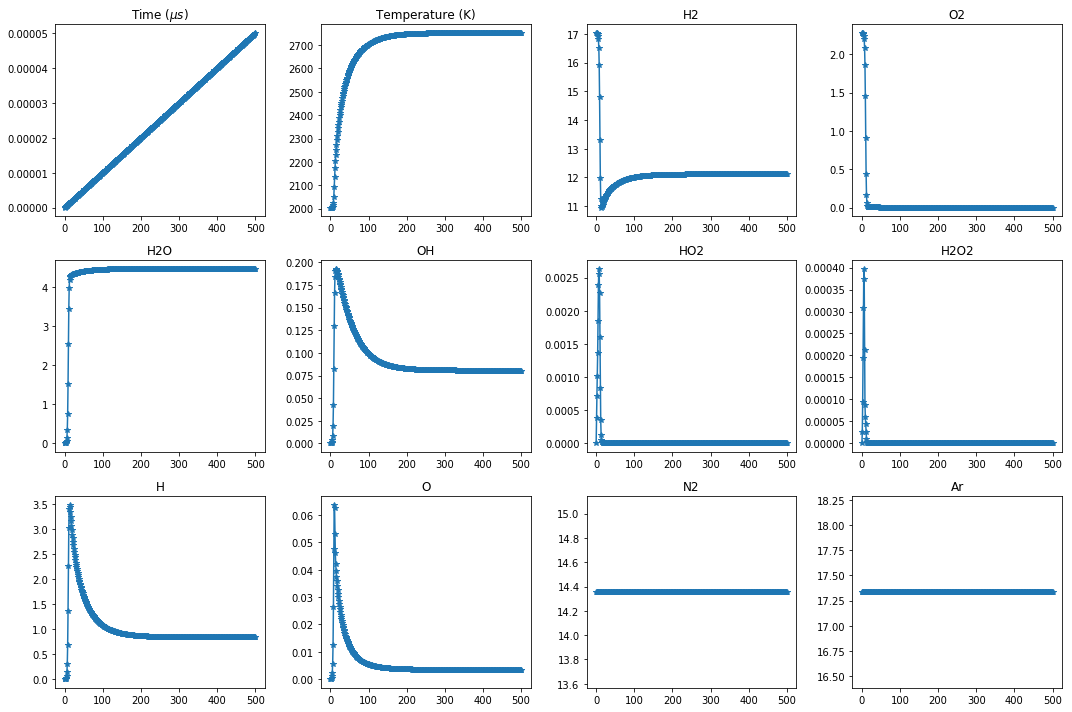

In [28]:
names = ['Time (${\mu}s$)',"Temperature (K)", "H2", "O2", "H2O", "OH", "HO2", "H2O2", "H", "O",
         "N2", "Ar"] # molar share
A = all_results[4]
fig, axs = plt.subplots(3,4, figsize=(15,10))
for i in range(3):
    for j in range(4):
        axs[i, j].plot(A[:, 4 * i + j], '-*')
        axs[i, j].set_title(names[4 * i + j])
plt.tight_layout()

## Пример изменения интенсивности производства компонент

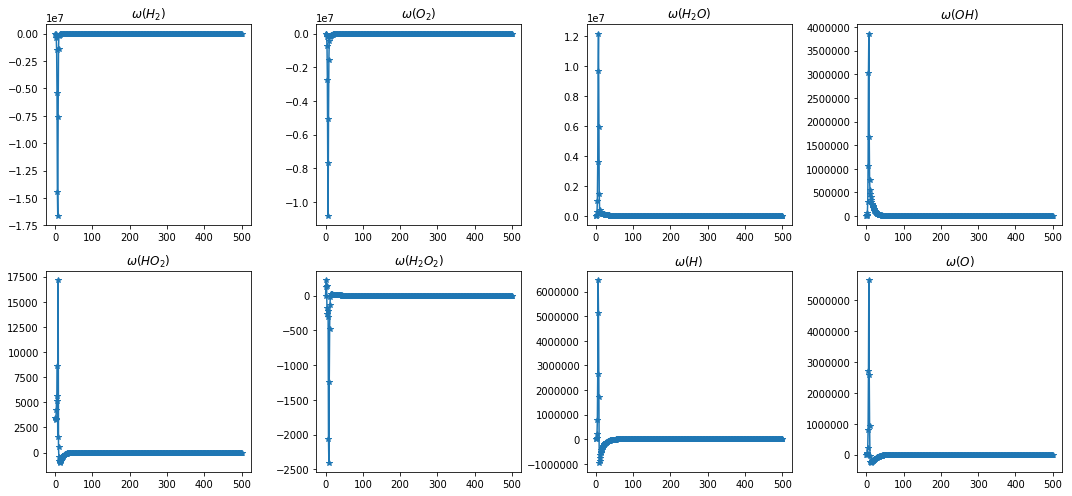

In [29]:
names = ["${\omega}(H_2)$", "${\omega}(O_2)$", "${\omega}(H_2O)$", "${\omega}(OH)$",
         "${\omega}(HO_2)$", "${\omega}(H_2O_2)$", "${\omega}(H)$", "${\omega}(O)$",
         "${\omega}(N_2)$", "${\omega}(Ar)"] # molar share
A = all_results[5]
fig, axs = plt.subplots(2,4, figsize=(15,7))
#ig.suptitle('Интенсивность производства компонент', fontsize=24)
for i in range(2):
    for j in range(4):
        axs[i, j].plot(A[:, 18 + 4 * i + j], '-*')
        axs[i, j].set_title(names[4 * i + j])

plt.tight_layout()
